In [50]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# ścieżki do plików
f_o2022 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2022.gpkg"
f_o2021 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2021.gpkg"
f_o2020 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2020.gpkg"
f_o2019 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2019.gpkg"
f_o2018 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2018.gpkg"

f_l2022 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_evrf_2022.gpkg"
f_l2021 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_evrf_2021.gpkg"
f_l2020 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_evrf_2020.gpkg"
f_l2019 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_evrf_2019.gpkg"
f_l2018 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_evrf_2018.gpkg"

f_lk2019 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_kron_2019.gpkg"
f_lk2018 = r"C:\SEM6\SISS\metadata\lidar\sk_lidar_kron_2018.gpkg"


# ORTO

In [52]:
# dictionary, aby móc łatwo się odwoływać do dataframeów
orto = {
2022: gpd.read_file(f_o2022),
2021: gpd.read_file(f_o2021),
2020: gpd.read_file(f_o2020),
2019: gpd.read_file(f_o2019),
2018: gpd.read_file(f_o2018),
}

# zamiana typu daty zrobienia zdjęcia (?) na datetime
for year in orto.keys():
    orto[year].drop(columns=['gml_id','nr_zglosz', 'akt_rok', 'zrodlo_danych'], inplace=True)
    orto[year]['timePosition'] = pd.to_datetime(orto[year]['timePosition'])

In [53]:
# robię testy dla wybranego roku. Przerobione: 2022...
wybrany_df = orto[2022]

In [54]:
# wyświetlenie jakie dane mamy
wybrany_df.tail(3)

,godlo,piksel,kolor,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry
65519,N-34-107-B-b-4-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60..."
65520,N-34-108-A-a-3-4,0.25,RGB,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61..."
65521,N-34-107-B-c-4-1,0.25,CIR,PL-1992,1:5000,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,58,"POLYGON ((787890.120 601780.560, 787855.170 60..."


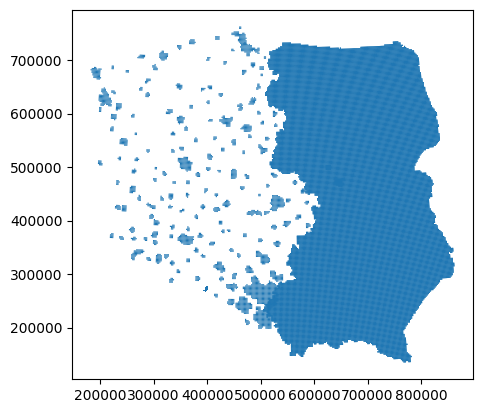

In [55]:
# wizualizacja poligonów reprezentujących arkusze ortofotomapy
wybrany_df.plot()
plt.show()

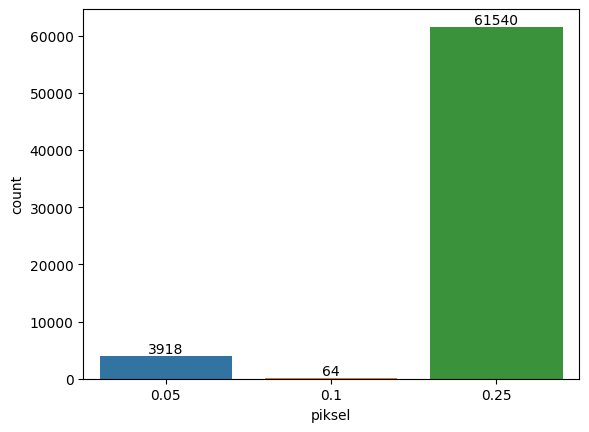

In [56]:
# GSD counts
ax = sns.countplot(x=wybrany_df['piksel'])
ax.bar_label(ax.containers[0])
plt.show()


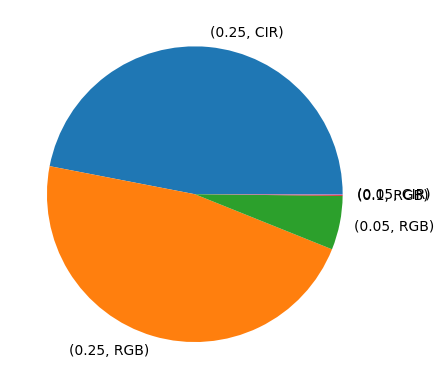

In [57]:
# GSD a kolor
wybrany_df[['piksel', 'kolor']].value_counts(['piksel', 'kolor']).plot(kind='pie')
plt.show()

# LIDAR

In [58]:
# dictionary, aby móc łatwo się odwoływać do dataframeów
lidar = {
2022: gpd.read_file(f_l2022),
2021: gpd.read_file(f_l2021),
2020: gpd.read_file(f_l2020),
2019: gpd.read_file(f_l2019),
2018: gpd.read_file(f_l2018),
}

lidar_kron = {
2019: gpd.read_file(f_lk2019),
2018: gpd.read_file(f_lk2018)
}

for year in lidar.keys():
    lidar[year].drop(columns=['zrodlo_danych', 'blad_sr_wys', 'nr_zglosz', 'uklad_h', 'asortyment', 'gml_id', 'akt_rok', 'format',], inplace=True)
    

In [59]:
lidar[2022]

,godlo,char_przestrz,uklad_xy,modul_archiwizacji,timePosition,czy_ark_wypelniony,url_do_pobrania,geometry
0,N-33-69-A-d-1-4-2-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((316179.020 709728.770, 315669.950 70..."
1,M-33-48-D-c-3-2-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((414486.420 314088.660, 413934.730 31..."
2,N-33-90-B-c-2-3-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((223178.000 638875.760, 222660.850 63..."
3,N-33-69-A-b-3-4-1-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((315347.110 714402.350, 314838.560 71..."
4,M-33-60-B-b-2-1-3-1,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((425462.450 309867.060, 424910.340 30..."
...,...,...,...,...,...,...,...,...
92767,N-33-92-D-a-2-2-4,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((291690.830 628967.290, 291716.370 62..."
92768,N-33-92-C-b-2-2-2,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((283455.590 630497.970, 283482.150 63..."
92769,N-33-92-C-b-2-3-4,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((281223.240 627119.570, 281250.040 62..."
92770,N-33-92-C-b-4-1-2,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((281169.650 625961.690, 281196.450 62..."


<AxesSubplot: >

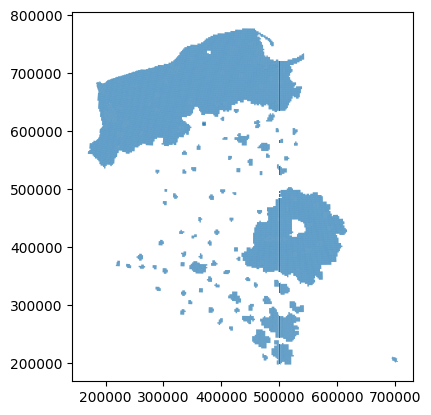

In [60]:
lidar[2022].plot()

# SJOIN, czyli łączenie ORTO i LIDAR

In [61]:
# spatial join - przyłączamy dane o orto do danych o lidar (zostaje geometria arkuszy lidar)
mega_df = lidar[2022].sjoin(wybrany_df, how="left", lsuffix='lidar', rsuffix='orto')
mega_df.dropna(inplace=True)

# nowa kolumna z różnicą czasu od wykonania zdjęcia do aktualizacji bdota (cokolwiek to znaczy)
# mega_df['time_diff'] = mega_df['timePosition'] - mega_df['Data_aktualizacji']

# wyświetlenie jakie dane mamy
mega_df

,godlo_lidar,char_przestrz,uklad_xy_lidar,modul_archiwizacji_lidar,timePosition_lidar,czy_ark_wypelniony_lidar,url_do_pobrania_lidar,geometry,index_orto,godlo_orto,piksel,kolor,uklad_xy_orto,modul_archiwizacji_orto,timePosition_orto,czy_ark_wypelniony_orto,url_do_pobrania_orto,wlk_pliku_MB
0,N-33-69-A-d-1-4-2-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((316179.020 709728.770, 315669.950 70...",755.0,N-33-69-A-d-1-4,0.05,RGB,PL-1992,1:5000,2022-03-20,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1096.0
1,M-33-48-D-c-3-2-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((414486.420 314088.660, 413934.730 31...",689.0,M-33-48-D-c-3-4,0.05,RGB,PL-1992,1:5000,2022-03-20,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1336.0
1,M-33-48-D-c-3-2-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((414486.420 314088.660, 413934.730 31...",769.0,M-33-48-D-c-3-3,0.05,RGB,PL-1992,1:5000,2022-03-20,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1320.0
1,M-33-48-D-c-3-2-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((414486.420 314088.660, 413934.730 31...",711.0,M-33-48-D-c-3-2,0.05,RGB,PL-1992,1:5000,2022-03-20,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1238.0
1,M-33-48-D-c-3-2-3-3,12 p/m2,PL-1992,1:1250,2022-03-20,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((414486.420 314088.660, 413934.730 31...",775.0,M-33-48-D-c-3-1,0.05,RGB,PL-1992,1:5000,2022-03-20,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92717,N-33-92-D-a-1-1-1,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((284491.360 630450.580, 284517.790 63...",1713.0,N-33-92-B-c-3-3,0.05,RGB,PL-1992,1:5000,2022-03-25,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1096.0
92728,N-33-92-D-a-1-2-1,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((286562.920 630356.480, 286589.100 63...",1728.0,N-33-92-B-c-3-4,0.05,RGB,PL-1992,1:5000,2022-03-25,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1093.0
92728,N-33-92-D-a-1-2-1,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((286562.920 630356.480, 286589.100 63...",1713.0,N-33-92-B-c-3-3,0.05,RGB,PL-1992,1:5000,2022-03-25,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1096.0
92731,N-33-92-D-a-2-2-1,4 p/m2,PL-1992,1:2500,2022-08-07,TAK,https://opendata.geoportal.gov.pl/NumDaneWys/D...,"POLYGON ((290706.090 630171.020, 290731.760 63...",1744.0,N-33-92-B-c-4-3,0.05,RGB,PL-1992,1:5000,2022-03-25,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1095.0


<AxesSubplot: >

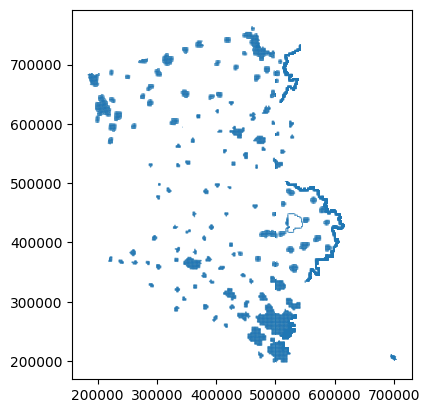

In [62]:
mega_df.plot()

In [63]:
# odnośnie bdota: przed ślepym pobieraniem arkuszy, sprawdzić, czy i ile budynków znajduje się w poligonie arkuszu, wykorzystać tylko te z dużą liczbą budynków